# A basic project to predict the weight of a person based on height and gender

In [181]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.metrics import *

In [9]:
# Getting the datasets
df = pd.read_csv('weight-height.csv')

In [12]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

Graphical Analysis of Data

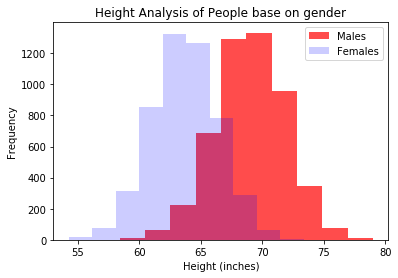

In [41]:
# A Histogram plotted to study the distribution of height of persons(male/female)

df[df['Gender']=='Male'].Height.plot(kind='hist',color='red',alpha=0.7)
df[df['Gender']=='Female'].Height.plot(kind='hist',color='blue',alpha=0.2)
plt.title('Height Analysis of People base on gender')
plt.legend(labels=['Males','Females'])
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()


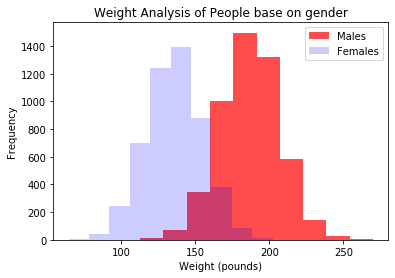

In [24]:
# A Histogram plotted to study the distribution of weight of persons(male/female)

df[df['Gender']=='Male'].Weight.plot(kind='hist',color='red',alpha=0.7)
df[df['Gender']=='Female'].Weight.plot(kind='hist',color='blue',alpha=0.2)
plt.title('Weight Analysis of People base on gender')
plt.legend(labels=['Males','Females'])
plt.xlabel('Weight (pounds)')
plt.ylabel('Frequency')
plt.show()

Getting the statistics of the height and weight distribution for both males and females

In [26]:
df[df['Gender']=='Male'].describe()

,Height,Weight
count,5000.000000,5000.000000
mean,69.026346,187.020621
std,2.863362,19.781155
min,58.406905,112.902939
25%,67.174679,173.887767
50%,69.027709,187.033546
75%,70.988744,200.357802
max,78.998742,269.989699


In [27]:
df[df['Gender']=='Female'].describe()

,Height,Weight
count,5000.000000,5000.000000
mean,63.708774,135.860093
std,2.696284,19.022468
min,54.263133,64.700127
25%,61.894441,122.934096
50%,63.730924,136.117583
75%,65.563565,148.810926
max,73.389586,202.237214


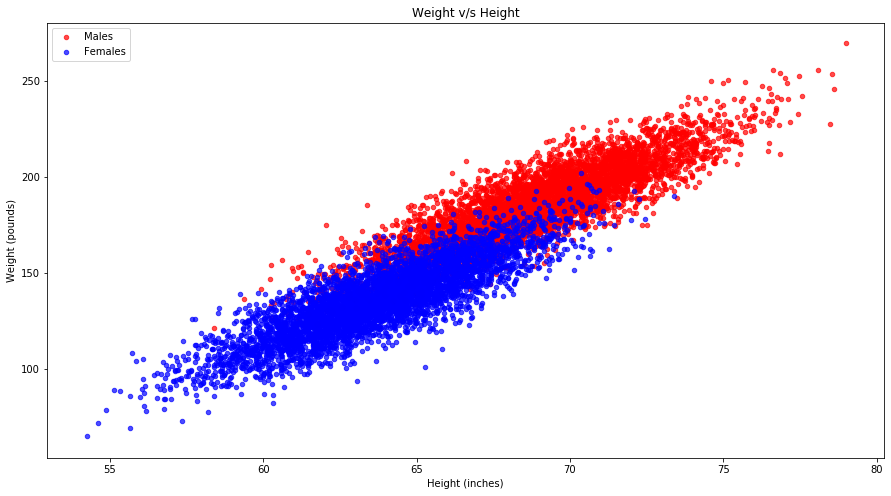

In [39]:
# Height v/s Weight plot for males and females
axis = df[df['Gender']=='Male'].plot(x='Height',y='Weight',kind='scatter',color='red',alpha = 0.7,figsize=(15,8))
df[df['Gender']=='Female'].plot(x='Height',y='Weight',kind='scatter',color='blue',ax=axis,alpha = 0.7,figsize=(15,8))
plt.title('Weight v/s Height')
plt.legend(labels=['Males','Females'])
plt.xlabel('Height (inches)')
plt.ylabel('Weight (pounds)') 
plt.show()

In [49]:
# Encoding categorical for Gender and dropping the dummy variable 
df = pd.get_dummies(df,drop_first=True)

In [56]:
df = df.rename(columns={"Gender_Male": "Gender"})

In [76]:
df.head()

,Height,Weight,Gender
0,73.847017,241.893563,1
1,68.781904,162.310473,1
2,74.110105,212.740856,1
3,71.730978,220.042470,1
4,69.881796,206.349801,1


In [145]:
X = df.iloc[:,[0,2]]
y = df.iloc[:,[1]]

In [146]:
X.head()

,Height,Gender
0,73.847017,1
1,68.781904,1
2,74.110105,1
3,71.730978,1
4,69.881796,1


In [147]:
y.head()

,Weight
0,241.893563
1,162.310473
2,212.740856
3,220.042470
4,206.349801


In [148]:
# Splitting the data set in test set and training set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [149]:
# Fitting model to linear Regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [150]:
# Using model to predict test data
y_pred = lin_reg.predict(X_test)

In [183]:
lin_reg.predict([[67.2,1]])

array([[176.12626233]])

In [180]:
# Evaluating the Model
print('The root mean squared error (RMSE) for the model is :',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('The r-squared value for the model is : ',r2_score(y_test,y_pred))

The root mean squared error (RMSE) for the model is : 9.893003699684016
The r-squared value for the model is :  0.9052889824534558
